# A Brief Introduction to Pandas
### Part 2

## 3.1 Selection
Using .loc(), .iloc()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Read in the complete version of the europe data, using the first column as the index
eur_data_final = pd.read_csv('./data/complete/eur_data_final.csv', index_col=0)

In [1]:
# Data from the eur_data_final df, represented as a python dictionary
countries_dict = {
    15: {'country': 'Italy', 
         'unemp_rate': 11.7, 
         'gdp': 1689824.0, 
         'median_income': 16237, 
         'total_pop': 59433744
        }
}

In [2]:
# With vanilla python, how do we get the word 'Italy' from a dictionary?
countries_dict[15]['country']

'Italy'

In [7]:
# How do we do this with a dataframe?
eur_data_final.loc[15, 'country']

'Italy'

In [8]:
# We can also get multiple columns
eur_data_final.loc[15, ['country', 'gdp']]

country        Italy
gdp        1689824.0
Name: 15, dtype: object

In [9]:
# Or an entire row/entry
eur_data_final.loc[12]

country           Hungary
unemp_rate            5.1
gdp              113903.8
median_income        8267
total_pop         9937628
Name: 12, dtype: object

In [10]:
# Or multiple rows and columns
eur_data_final.loc[[9,10], ['country','gdp']]

,country,gdp
9,France,2228568.0
10,Germany,3159750.0


In [11]:
# We can also use python's index slicing syntax
eur_data_final.loc[9:14, ['country','gdp']]

,country,gdp
9,France,2228568.0
10,Germany,3159750.0
11,Greece,176487.9
12,Hungary,113903.8
13,Iceland,18646.1
14,Ireland,273238.2


In [18]:
# Select by column value (Pandas is smart!)
# DF must be indexed by country name
eur_data_country_index = eur_data_final.sort_values('country').set_index('country')
eur_data_country_index.loc['Slovenia']

unemp_rate             8.0
gdp                40357.2
median_income      15250.0
total_pop        2050189.0
Name: Slovenia, dtype: float64

### Exercise - What countries have a higher unemployment rate than Slovenia and have a lowercase 't' in their name?

In [20]:
# Select slovenia unemployment values
slovenia_unemployment = eur_data_country_index.loc['Slovenia', 'unemp_rate']
# Generate comparison query
gt_slov = eur_data_final.unemp_rate > slovenia_unemployment
# Generate 'contains' query
t_names = eur_data_final.country.str.contains('t')
# Make selection using queries
eur_data_final[gt_slov & t_names]

,country,unemp_rate,gdp,median_income,total_pop
3,Croatia,13.1,46639.5,8985,4284889
15,Italy,11.7,1689824.0,16237,59433744
16,Latvia,9.6,25037.7,9257,2070371
23,Portugal,11.2,186480.5,10805,10562178


### Exercise - Generate a correlation matrix for the various columns and plot them using matplotlib

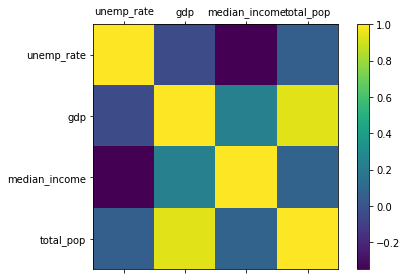

In [23]:
# Select columns
cols = eur_data_final.columns

# Make subplot and figure
fig, ax = plt.subplots(1, 1)

# Generate correlation matrix
corr_data = eur_data_final.corr()

# Generate matplotlib plot
cax = ax.matshow(corr_data) 

# Add colorbar to figure
fig.colorbar(cax)

# Set tick labels
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

fig.tight_layout()